## 2nd homework

- You should download and use the attached dataset in Moodle, it is not allowed to download this dataset from the other sources as the data configuration is different. 
- Note that your code should be fully executable. 


- You don't have to use the test dataset in the training procedure. If you need the validation data, it should be taken from the training data.  

- you can use the "fit" option which automatically takes the validation data from the training data. 

- e.g., model_1.fit(x = train_data, y =train_label, validation_split = 0.2, epochs=50)


- You can either use "train_dataset" or "train_data". "train_dataset" has been formatted by Keras API with batches. 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/DirectoryIterator

- Note that the labels are already implemented in the "train_dataset", so you can simply use "model.fit" function without adding a label, i.e., model.fit(train_dataset). 
- Otherwise, you should also provide the data and its label as well for "train_data", i.e., model.fit(x = train_data, y = train_label)         
- Image size and scale should be fixed as (224, 244) and [0 - 1], respectively. 
- The given outputs in this file are the examples, you can freely choose your preferred model structures.   

In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

from tensorflow.keras.utils import to_categorical  
import tensorflow.keras.utils as util
from tensorflow.keras.layers.experimental import preprocessing

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

cwd = os.getcwd()

train_path = os.path.join(cwd, 'Covid19-dataset/train')
test_path = os.path.join(cwd, 'Covid19-dataset/test')

train_dataset = train.flow_from_directory(train_path,
                                          target_size = (224, 224),
                                          batch_size=32,)
                                     
test_dataset = test.flow_from_directory(test_path,
                                          target_size= (224, 224),
                                          batch_size=32,)
train_dataset.class_indices
train_dataset.classes

# total training sample : 251 
# batch size = 32 
# train_dataset has 8 batches; 251 / 32 -> train_dataset[0-7][0]

train_data = []
train_label = []
test_data = []
test_label = []
for i in range(len(train_dataset)):
    train_data.append(train_dataset[i][0]) 
    train_label.append(train_dataset[i][1])    
    
train_data = np.concatenate(train_data, axis = 0)    
train_label = np.concatenate(train_label, axis = 0)

for i in range(len(test_dataset)):
    test_data.append(test_dataset[i][0]) 
    test_label.append(test_dataset[i][1])

test_data = np.concatenate(test_data, axis = 0)    
test_label = np.concatenate(test_label, axis = 0)

# or you can use entire trainig dataset (all batches are concatenated), 
# as we can use the batch option at "model.fit" function


Found 162 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


### task 1 (5 points). Create 5 x 3 figures, and plot ten images per class

In [40]:
4816896 / 2048 

2352.0

In [74]:
train_data.shape

(162, 224, 224, 3)

In [ ]:
fig, axs = plt.subplots(3)


In [91]:
from matplotlib import pyplot as plt


c1 = np.where(train_label[:,0]==1)
c2 = np.where(train_label[:,1]==1)
c3 = np.where(train_label[:,2]==1)

classes = list(train_dataset.class_indices.keys())
    

<Figure size 2000x1000 with 0 Axes>

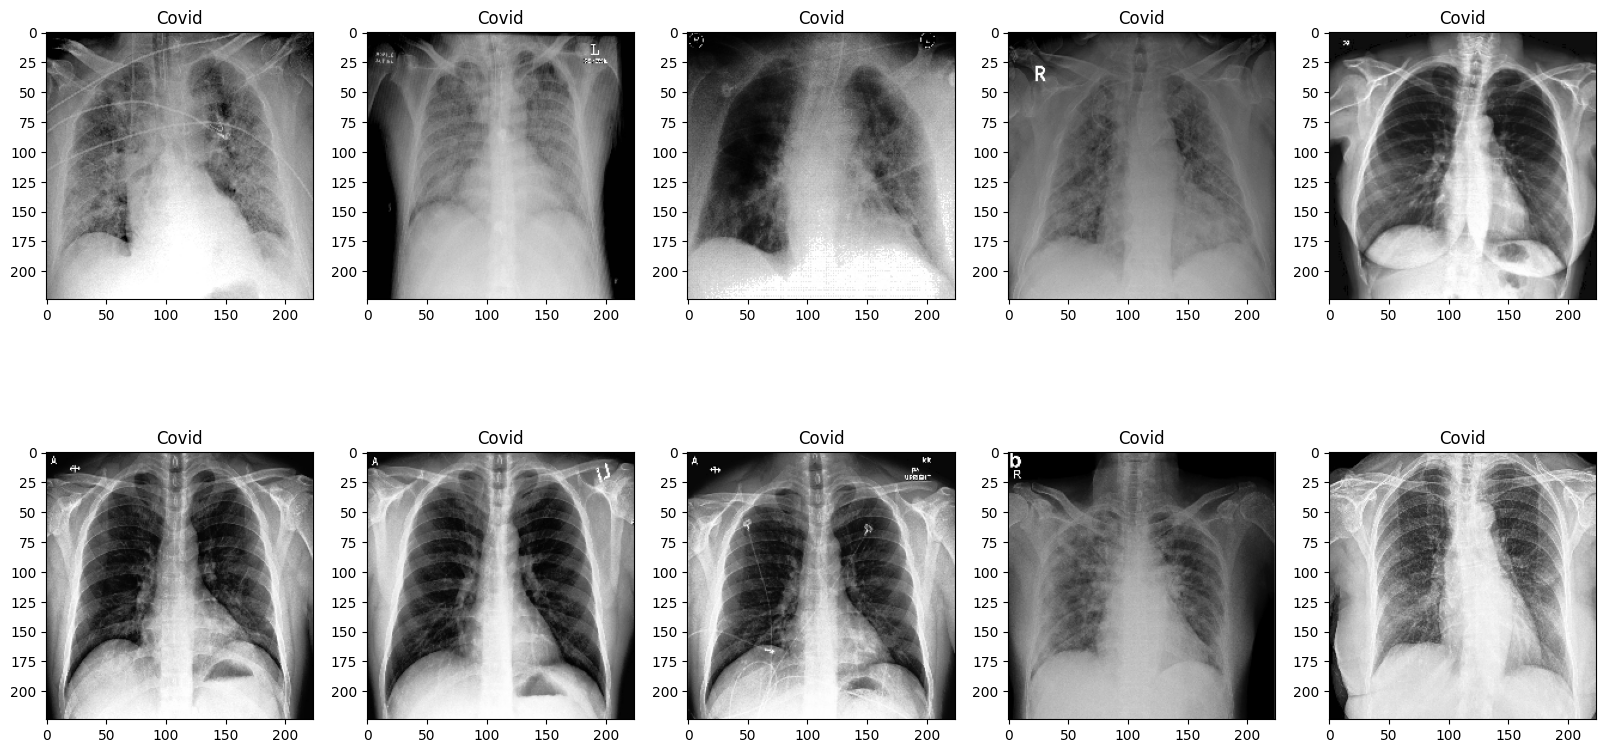

In [108]:
rows = 2
columns = 5

fig = plt.figure(figsize=(20, 10))


for i in range(10):
    img = train_data[c1[0][i]]
    fig.add_subplot(rows, columns, i + 1)
    plt.title(f'{classes[0]}')
    plt.imshow(img)
plt.show()

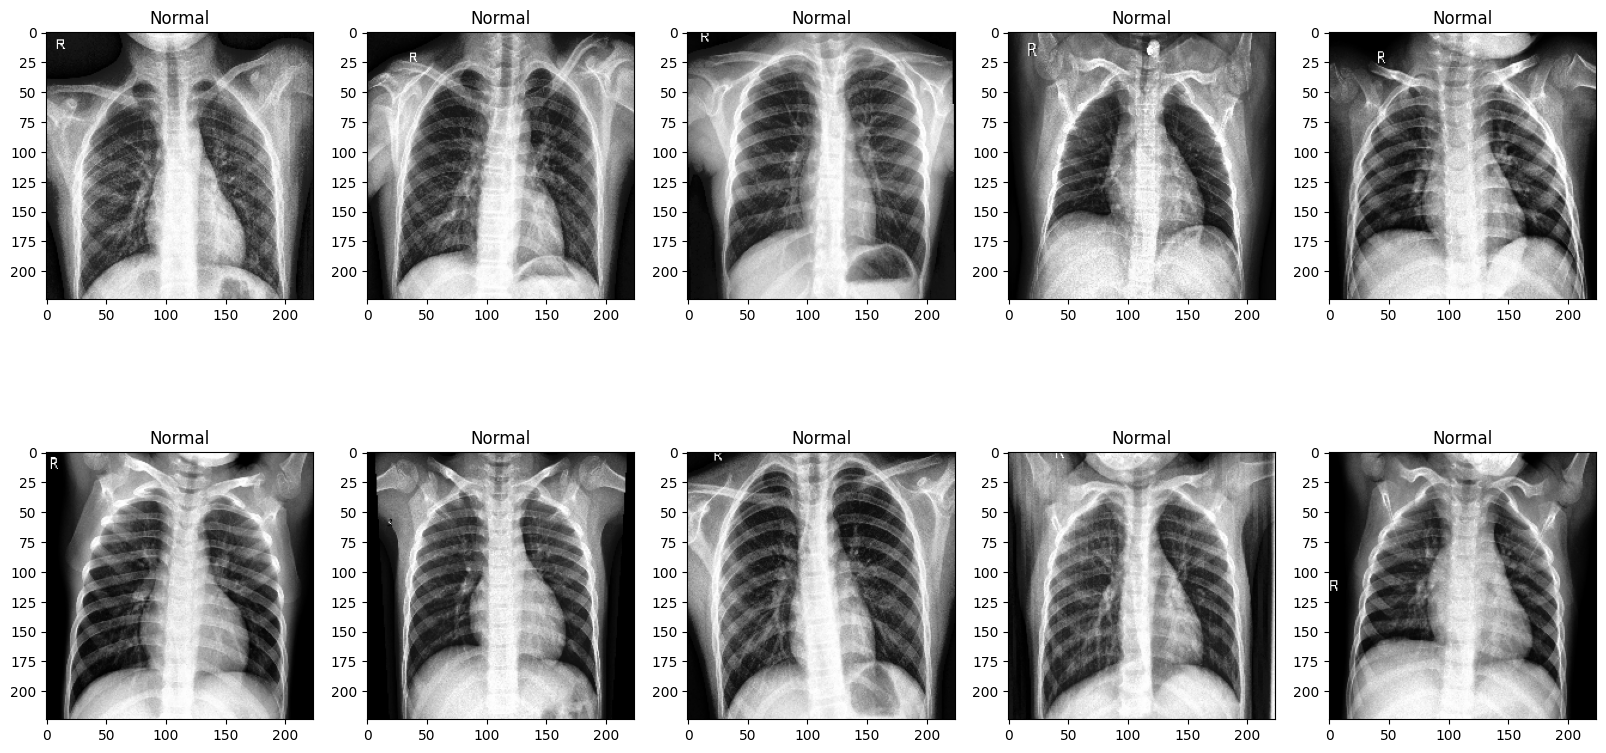

In [110]:
rows = 2
columns = 5

fig = plt.figure(figsize=(20, 10))


for i in range(10):
    img = train_data[c2[0][i]]
    fig.add_subplot(rows, columns, i + 1)
    plt.title(f'{classes[1]}')
    plt.imshow(img)
plt.show()

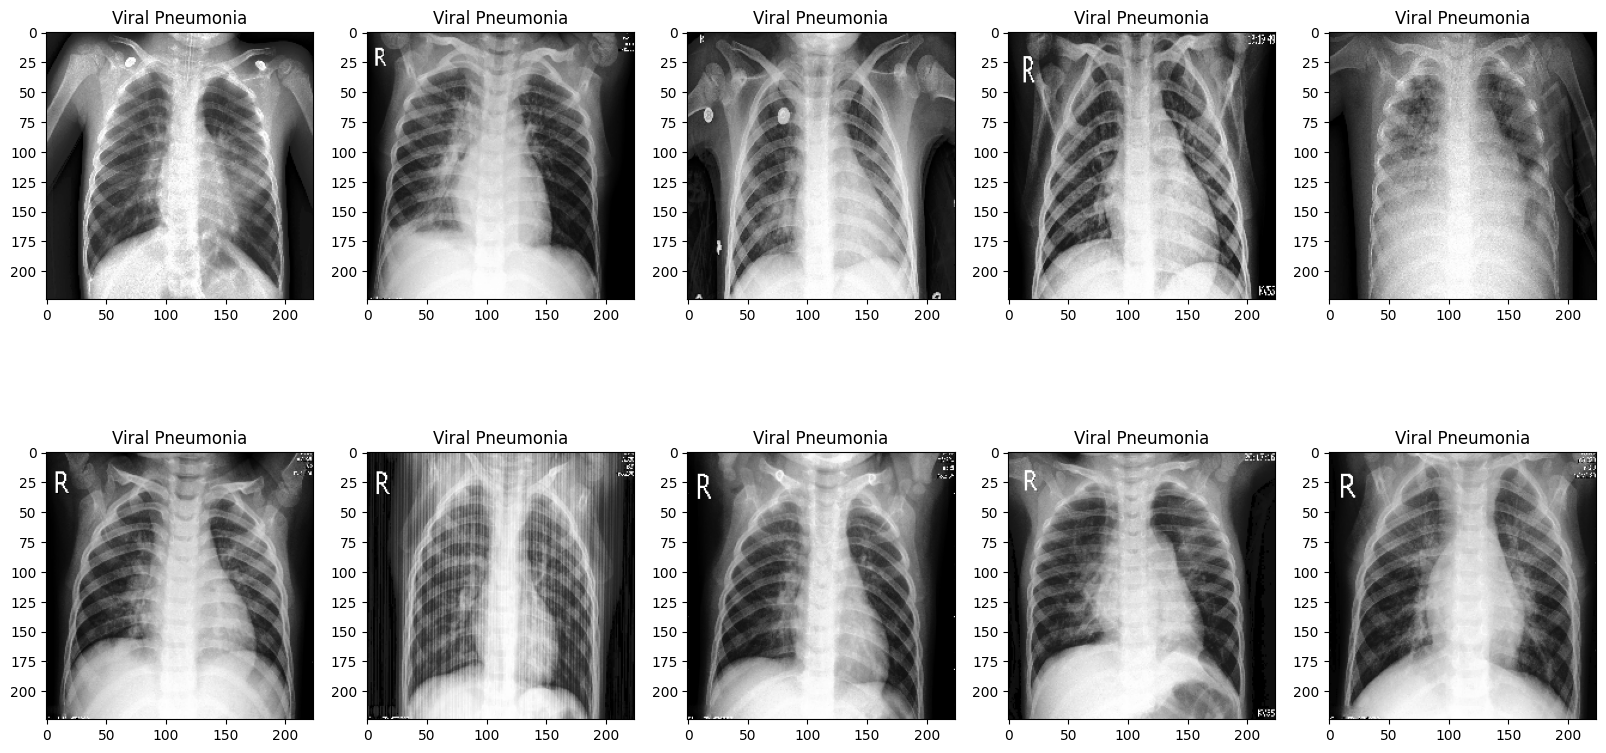

In [109]:
rows = 2
columns = 5

fig = plt.figure(figsize=(20, 10))


for i in range(10):
    img = train_data[c3[0][i]]
    fig.add_subplot(rows, columns, i + 1)
    plt.title(f'{classes[2]}')
    plt.imshow(img)
plt.show()

### task 2 (10 points). Create your own CNN model and show its performance on test dataset with two criterias; accuracy, and confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
keras.layers.Flatten

In [115]:
def model1():
  
    inputs = keras.Input(shape=(224, 224, 3))
    x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
    x = keras.layers.Conv2D(64, (4, 4), activation="relu", padding="same")(x)
    x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
    flatten = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(flatten)
    outputs = keras.layers.Dense(3, activation='relu')(x)

    model = keras.Model(inputs, outputs, name= "model1")        
    return model

In [119]:
model_1 = model1()
model_1.summary()
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics= 'accuracy')

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      32832     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 200704)            0    

In [ ]:
model_1.fit(x=train_dataset, epochs=20, validation_data=train_dataset)

Epoch 1/20
6/6 [==============================] - 22s 4s/step - loss: nan - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.4506
Epoch 2/20
6/6 [==============================] - 20s 3s/step - loss: nan - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.4506
Epoch 3/20
6/6 [==============================] - 19s 3s/step - loss: nan - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.4506
Epoch 4/20
6/6 [==============================] - 18s 3s/step - loss: nan - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.4506
Epoch 5/20
6/6 [==============================] - 19s 3s/step - loss: nan - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.4506
Epoch 6/20


In [82]:
model_1 = model1()
model_1.summary()
model_1.compile()

model_1.fit()


Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               23888

In [83]:
print(model_1.evaluate())
confusion_matrix()

5/5 [==============================] - 0s 23ms/step - loss: 0.4346 - accuracy: 0.8452
[0.4346407949924469, 0.8451613187789917]


array([[63,  0,  1],
       [ 3, 28, 17],
       [ 0,  3, 40]], dtype=int64)

### task 3 (10 points). Transfer learning 
- Import pre-trained model from any dataset and append a classifier to the top of the model.
- freeze convolutional layers and train the classifier. 
- show its performance on the test dataset

In [4]:
transferred_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),
                                               include_top=False,  # True
                                               weights='imagenet',)
transferred_model.trainable = False
transferred_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:


model_3.compile()

model_3.fit()


Model: "model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 17,926,467
Trainable params: 3,211,779
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 7s 71ms/step - loss: 2.5623 - accuracy: 0.4259
Epoch 2/1

In [86]:
model_3.evaluate()
confusion_matrix()

5/5 [==============================] - 1s 68ms/step - loss: 0.2014 - accuracy: 0.8968


array([[63,  0,  1],
       [ 3, 33, 12],
       [ 0,  0, 43]], dtype=int64)

### task 4 (10 points).
- Unfreeze the convolutionla layer and find-tune the entire model to out dataset
- Show its performance on the test dataset

In [87]:
model_3.trainable =
model_3.fit()

Epoch 1/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0079 - accuracy: 1.0000


In [88]:
model_3.evaluate()
confusion_matrix()

5/5 [==============================] - 0s 34ms/step - loss: 0.1652 - accuracy: 0.9161


array([[63,  0,  1],
       [ 2, 37,  9],
       [ 0,  1, 42]], dtype=int64)

### task 5 (15 points).
- improve the model performance by applying any techniques. Even though the specific technique will not improve the performance, you should show all of your approaches here. 

### task 6 (15 points)
- discuss what you have done to optize the model's performance and report your final score on test dataset. 
- your final score will be relatively evaluated.